In [3]:
using CSV
using DataFrames
#using DataFramesMeta
using Plots

In [39]:
# x = CSV.File("S94_RD58_stat_summary.xls")
# df = DataFrame(x)

rd58_df = DataFrame(CSV.File("S94_RD58_stat_summary.xls"))
rd58_50bp_df = DataFrame(CSV.File("S94_RD58_50bp_stat_summary.xls"))
rd58_50bp_1m_df = DataFrame(CSV.File("S94_RD58_50bp_1M_stat_summary.xls"))
rd58_50bp_2m_df = DataFrame(CSV.File("S94_RD58_50bp_2M_stat_summary.xls"))
rd58_50bp_5m_df = DataFrame(CSV.File("S94_RD58_50bp_5M_stat_summary.xls"))

,sample,species,reads,ribo_reads,ercc_reads,ercc_reads(%)
,String,String,Int64,String,String,String
1,RD58-100pg_S7_50bp_5M_L002,Mus_musculus,5000000,NA,NA,NA
2,RD58-10ng_S10_50bp_5M_L002,Mus_musculus,5000000,NA,NA,NA
3,RD58-10pg_S6_50bp_5M_L002,Mus_musculus,2216467,NA,NA,NA
4,RD58-1ng_S9_50bp_5M_L002,Mus_musculus,5000000,NA,NA,NA
5,RD58-500pg_S8_50bp_5M_L002,Mus_musculus,5000000,NA,NA,NA


In [40]:
#df = hcat(rd58_df, rd58_1m_df, makeunique=true)
rd58_df = vcat(rd58_df, rd58_50bp_df, rd58_50bp_1m_df, rd58_50bp_2m_df, rd58_50bp_5m_df)
#remove "_L002"
rd58_df[!, "sample"] = replace.(rd58_df[!, "sample"], r"_L002" => "")
rd58_df

,sample,species,reads,ribo_reads,ercc_reads,ercc_reads(%)
,String,String,Int64,String,String,String
1,RD58-100pg_S7,Mus_musculus,6096257,NA,NA,NA
2,RD58-10ng_S10,Mus_musculus,12590390,NA,NA,NA
3,RD58-10pg_S6,Mus_musculus,2216467,NA,NA,NA
4,RD58-1ng_S9,Mus_musculus,5381029,NA,NA,NA
5,RD58-500pg_S8,Mus_musculus,6870582,NA,NA,NA
6,RD58-100pg_S7_50bp,Mus_musculus,6096257,NA,NA,NA
7,RD58-10ng_S10_50bp,Mus_musculus,12590390,NA,NA,NA
8,RD58-10pg_S6_50bp,Mus_musculus,2216467,NA,NA,NA
9,RD58-1ng_S9_50bp,Mus_musculus,5381029,NA,NA,NA


In [41]:
#myOrder = ["RD58-10pg_S6", "RD58-100pg_S7", "RD58-500pg_S8", "RD58-1ng_S9", "RD58-10ng_S10","RD58-10pg_S6_1M", "RD58-100pg_S7_1M", "RD58-500pg_S8_1M", "RD58-1ng_S9_1M", "RD58-10ng_S10_1M", "RD58-10pg_S6_2M", "RD58-100pg_S7_2M", "RD58-500pg_S8_2M", "RD58-1ng_S9_2M", "RD58-10ng_S10_2M", "RD58-100pg_S7_5M", "RD58-500pg_S8_5M", "RD58-1ng_S9_5M", "RD58-10ng_S10_5M", "RD58-10pg_S6_50bp", "RD58-100pg_S7_50bp", "RD58-500pg_S8_50bp", "RD58-1ng_S9_50bp","RD58-10ng_S10_50bp"]
myOrder = [
    "RD58-10pg_S6", 
    "RD58-100pg_S7", 
    "RD58-500pg_S8", 
    "RD58-1ng_S9", 
    "RD58-10ng_S10",
    
    "RD58-10pg_S6_50bp", 
    "RD58-100pg_S7_50bp", 
    "RD58-500pg_S8_50bp", 
    "RD58-1ng_S9_50bp",
    "RD58-10ng_S10_50bp",
    
    "RD58-10pg_S6_50bp_1M", 
    "RD58-100pg_S7_50bp_1M", 
    "RD58-500pg_S8_50bp_1M", 
    "RD58-1ng_S9_50bp_1M", 
    "RD58-10ng_S10_50bp_1M",
    
    "RD58-10pg_S6_50bp_2M", 
    "RD58-100pg_S7_50bp_2M", 
    "RD58-500pg_S8_50bp_2M", 
    "RD58-1ng_S9_50bp_2M", 
    "RD58-10ng_S10_50bp_2M", 
    
    "RD58-100pg_S7_50bp_5M", 
    "RD58-500pg_S8_50bp_5M", 
    "RD58-1ng_S9_50bp_5M", 
    "RD58-10ng_S10_50bp_5M"
]
#rd58_df = @rorderby rd58_df findfirst(==(:sample), myOrder)
rd58_df = rd58_df[indexin(myOrder, rd58_df.sample),:]

,sample,species,reads,ribo_reads,ercc_reads,ercc_reads(%)
,String,String,Int64,String,String,String
1,RD58-10pg_S6,Mus_musculus,2216467,NA,NA,NA
2,RD58-100pg_S7,Mus_musculus,6096257,NA,NA,NA
3,RD58-500pg_S8,Mus_musculus,6870582,NA,NA,NA
4,RD58-1ng_S9,Mus_musculus,5381029,NA,NA,NA
5,RD58-10ng_S10,Mus_musculus,12590390,NA,NA,NA
6,RD58-10pg_S6_50bp,Mus_musculus,2216467,NA,NA,NA
7,RD58-100pg_S7_50bp,Mus_musculus,6096257,NA,NA,NA
8,RD58-500pg_S8_50bp,Mus_musculus,6870582,NA,NA,NA
9,RD58-1ng_S9_50bp,Mus_musculus,5381029,NA,NA,NA


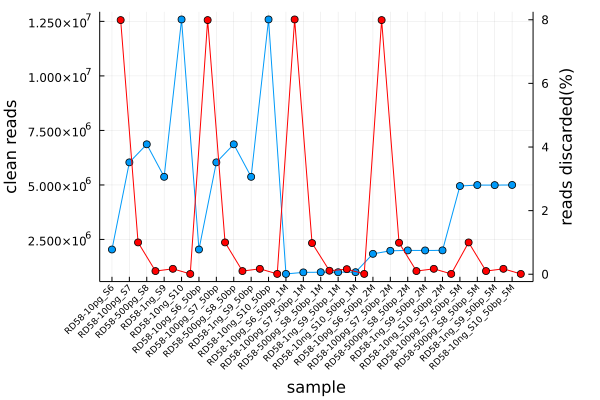

In [7]:
gr()
plot(rd58_df[!, "sample"], 
    rd58_df[!, "clean_reads"], 
    marker = :circle,
    legend = :topleft, 
    xlabel = "sample", 
    ylabel = "clean reads", 
    #label = "clean reads",
    label=false, 
    right_margin = 15Plots.mm,
    xrotation = 45, 
    xtickfont = font(6),
    xticks = :all)

newColumn = parse.(Float64, replace.(rd58_df[!, "discarded(%)"], r"%" => ""))
plot!(twinx(),
    newColumn,
    marker = :circle,
    legend = :topright,
    ylabel ="reads discarded(%)",
    label = false,
    xaxis = nothing,
    color = :red,
    right_margin = 15Plots.mm
)

In [8]:
rd59_df = DataFrame(CSV.File("S94_RD59_stat_summary.xls"))
rd59_50bp_df = DataFrame(CSV.File("S94_RD59_50bp_stat_summary.xls"))
rd59_50bp_1m_df = DataFrame(CSV.File("S94_RD59_50bp_1M_stat_summary.xls"))
rd59_50bp_2m_df = DataFrame(CSV.File("S94_RD59_50bp_2M_stat_summary.xls"))
rd59_50bp_5m_df = DataFrame(CSV.File("S94_RD59_50bp_5M_stat_summary.xls"))

rd59_df = vcat(rd59_df, rd59_50bp_df, rd59_50bp_1m_df, rd59_50bp_2m_df, rd59_50bp_5m_df)

,sample,species,reads,ribo_reads,ercc_reads,ercc_reads(%)
,String,String,Int64,String,String,String
1,RD59-1-ng_S4_L002,Homo_sapiens,9324827,NA,NA,NA
2,RD59-10-pg_S1_L002,Homo_sapiens,11787482,NA,NA,NA
3,RD59-100-pg_S2_L002,Homo_sapiens,15932075,NA,NA,NA
4,RD59-25-ng_S5_L002,Homo_sapiens,16158726,NA,NA,NA
5,RD59-500-pg_S3_L002,Homo_sapiens,7778651,NA,NA,NA
6,RD59-1-ng_S4_50bp_L002,Homo_sapiens,9324827,NA,NA,NA
7,RD59-10-pg_S1_50bp_L002,Homo_sapiens,11787482,NA,NA,NA
8,RD59-100-pg_S2_50bp_L002,Homo_sapiens,15932075,NA,NA,NA
9,RD59-25-ng_S5_50bp_L002,Homo_sapiens,16158726,NA,NA,NA


In [9]:
rd59_df[!, "sample"]  = replace.(replace.(replace.(rd59_df[!, "sample"], r"_L002" => ""), r"-ng" => "ng"), r"-pg" => "pg")
rd59_df

,sample,species,reads,ribo_reads,ercc_reads,ercc_reads(%)
,String,String,Int64,String,String,String
1,RD59-1ng_S4,Homo_sapiens,9324827,NA,NA,NA
2,RD59-10pg_S1,Homo_sapiens,11787482,NA,NA,NA
3,RD59-100pg_S2,Homo_sapiens,15932075,NA,NA,NA
4,RD59-25ng_S5,Homo_sapiens,16158726,NA,NA,NA
5,RD59-500pg_S3,Homo_sapiens,7778651,NA,NA,NA
6,RD59-1ng_S4_50bp,Homo_sapiens,9324827,NA,NA,NA
7,RD59-10pg_S1_50bp,Homo_sapiens,11787482,NA,NA,NA
8,RD59-100pg_S2_50bp,Homo_sapiens,15932075,NA,NA,NA
9,RD59-25ng_S5_50bp,Homo_sapiens,16158726,NA,NA,NA


In [22]:
myOrder2 = [
     "RD59-10pg_S1",
     "RD59-100pg_S2",
     "RD59-500pg_S3",
     "RD59-1ng_S4",
     "RD59-25ng_S5",
    
     "RD59-10pg_S1_50bp",
     "RD59-100pg_S2_50bp",
     "RD59-500pg_S3_50bp",
     "RD59-1ng_S4_50bp",
     "RD59-25ng_S5_50bp",
    
     "RD59-10pg_S1_50bp_1M",
     "RD59-100pg_S2_50bp_1M",
     "RD59-500pg_S3_50bp_1M",
     "RD59-1ng_S4_50bp_1M",
     "RD59-25ng_S5_50bp_1M",

     "RD59-10pg_S1_50bp_2M",
     "RD59-100pg_S2_50bp_2M",
     "RD59-500pg_S3_50bp_2M",
     "RD59-1ng_S4_50bp_2M",
     "RD59-25ng_S5_50bp_2M",

     "RD59-10pg_S1_50bp_5M",
     "RD59-100pg_S2_50bp_5M",
     "RD59-500pg_S3_50bp_5M",
     "RD59-1ng_S4_50bp_5M",
     "RD59-25ng_S5_50bp_5M",
]
rd59_df = rd59_df[indexin(myOrder2, rd59_df.sample),:]

,sample,species,reads,ribo_reads,ercc_reads,ercc_reads(%)
,String,String,Int64,String,String,String
1,RD59-10pg_S1,Homo_sapiens,11787482,NA,NA,NA
2,RD59-100pg_S2,Homo_sapiens,15932075,NA,NA,NA
3,RD59-500pg_S3,Homo_sapiens,7778651,NA,NA,NA
4,RD59-1ng_S4,Homo_sapiens,9324827,NA,NA,NA
5,RD59-25ng_S5,Homo_sapiens,16158726,NA,NA,NA
6,RD59-10pg_S1_50bp,Homo_sapiens,11787482,NA,NA,NA
7,RD59-100pg_S2_50bp,Homo_sapiens,15932075,NA,NA,NA
8,RD59-500pg_S3_50bp,Homo_sapiens,7778651,NA,NA,NA
9,RD59-1ng_S4_50bp,Homo_sapiens,9324827,NA,NA,NA


In [11]:
plotlyjs()
plot(rd59_df[!, "sample"], 
    rd59_df[!, "reads"], 
    #seriestype = :scatter,
    marker = :circle,
    xlabel = "sample", 
    ylabel = "reads", 
    label = false, 
    xrotation = 45, 
    xticks = :all)

WebIO._IJuliaInit()

In [12]:
newColumn = parse.(Float64, replace.(rd59_df[!, "uniquely_mapped"], r"%" => ""))
plot(rd59_df[!, "sample"], 
    newColumn, 
    marker = :circle,
    xlabel = "sample", 
    ylabel = "uniquely_mapped(%)", 
    label = false, 
    xrotation = 45, 
    xticks = :all)

In [13]:
newColumn58 = parse.(Float64, replace.(rd58_df[!, "uniquely_mapped"], r"%" => ""))
plot(rd58_df[!, "sample"], 
    newColumn58, 
    #seriestype = :scatter,
    marker = :circle,
    xlabel = "sample", 
    ylabel = "uniquely_mapped(%)", 
    label = "RD58",
    legendfontsize=6,
    xrotation = 45,
    xtickfontsize=5,
    xticks = :all)

newColumn59 = parse.(Float64, replace.(rd59_df[!, "uniquely_mapped"], r"%" => ""))
plot!(rd59_df[!, "sample"], 
    newColumn59, 
    marker = :circle,
    xlabel = "sample", 
    ylabel = "uniquely mapped(%)", 
    label = "RD59", 
    legendfontsize=6,
    xrotation = 45,
    xtickfontsize=5,
    xticks = :all)

In [14]:
# rd58_unique = rd58_df[!, ["sample", "uniquely_mapped"]]
# insert!.(eachcol(rd58_unique), 21, ["RD58-10pg_S6_50bp_5M", "missing"])
# rd59_unique = rd59_df[!, ["sample", "uniquely_mapped"]]
# unique_merge = hcat(rd58_unique, rd59_unique, makeunique=true)

,sample,uniquely_mapped,sample_1,uniquely_mapped_1
,String,String,String,String
1,RD58-10pg_S6,81.36%,RD59-10pg_S1,90.81%
2,RD58-100pg_S7,91.21%,RD59-100pg_S2,89.24%
3,RD58-500pg_S8,88.45%,RD59-500pg_S3,86.26%
4,RD58-1ng_S9,91.13%,RD59-1ng_S4,91.56%
5,RD58-10ng_S10,88.65%,RD59-25ng_S5,80.79%
6,RD58-10pg_S6_50bp,79.75%,RD59-10pg_S1_50bp,87.57%
7,RD58-100pg_S7_50bp,89.29%,RD59-100pg_S2_50bp,85.92%
8,RD58-500pg_S8_50bp,86.54%,RD59-500pg_S3_50bp,83.06%
9,RD58-1ng_S9_50bp,89.19%,RD59-1ng_S4_50bp,88.31%


In [58]:
rd58_150bp_clean = rd58_df[!, ["sample", "clean_reads"]][1:5, :]
rd59_150bp_clean = rd59_df[!, ["sample", "clean_reads"]][1:5, :]
rd_150bp_clean_merge = hcat(rd58_150bp_clean, rd59_150bp_clean, makeunique=true)

clean1 = rd_150bp_clean_merge[!, "clean_reads"]
clean2 = rd_150bp_clean_merge[!, "clean_reads_1"]

plot(
    [clean1, clean2],
    marker = :circle,
    xlabel = "RNA input", 
    ylabel = "clean reads", 
    #ylim = (0, 100),
    label = ["RD58" "RD59"],
    legend=:right,
    xrotation = 45,
    xticks = (1:5, ("10pg", "100pg", "500pg", "1ng", "10ng/25ng"))
    )

In [15]:
rd58_150bp_unique = rd58_df[!, ["sample", "uniquely_mapped"]][1:5, :]
rd59_150bp_unique = rd59_df[!, ["sample", "uniquely_mapped"]][1:5, :]
rd_150bp_unique_merge = hcat(rd58_150bp_unique, rd59_150bp_unique, makeunique=true)

,sample,uniquely_mapped,sample_1,uniquely_mapped_1
,String,String,String,String
1,RD58-10pg_S6,81.36%,RD59-10pg_S1,90.81%
2,RD58-100pg_S7,91.21%,RD59-100pg_S2,89.24%
3,RD58-500pg_S8,88.45%,RD59-500pg_S3,86.26%
4,RD58-1ng_S9,91.13%,RD59-1ng_S4,91.56%
5,RD58-10ng_S10,88.65%,RD59-25ng_S5,80.79%


In [33]:
unique1 = parse.(Float64, replace.(rd_150bp_unique_merge[!, "uniquely_mapped"], r"%" => ""))
unique2 = parse.(Float64, replace.(rd_150bp_unique_merge[!, "uniquely_mapped_1"], r"%" => ""))

plot(
    [unique1, unique2], 
    marker = :circle,
    xlabel = "RNA input", 
    ylabel = "uniquely mapped (%)", 
    ylim = (0, 100),
    label = ["RD58" "RD59"],
    legend=:right,
    xrotation = 45,
    xticks = (1:5, ("10pg", "100pg", "500pg", "1ng", "10ng/25ng"))
    )

In [63]:
# rd58_duplicate = rd58_df[!, ["sample", "duplicate_rate"]]
# insert!.(eachcol(rd58_duplicate), 21, ["RD58-10pg_S6_50bp_5M", "missing"])
# rd59_duplicate = rd59_df[!, ["sample", "duplicate_rate"]]
# duplicate_merge = hcat(rd58_duplicate, rd59_duplicate, makeunique=true)

rd58_150bp_duplicate = rd58_df[!, ["sample", "duplicate_rate"]][1:5, :]
rd59_150bp_duplicate = rd59_df[!, ["sample", "duplicate_rate"]][1:5, :]
rd_150bp_duplicate_merge = hcat(rd58_150bp_duplicate, rd59_150bp_duplicate, makeunique=true)

duplicate1 = parse.(Float64, replace.(rd_150bp_duplicate_merge[!, "duplicate_rate"], r"%" => ""))
duplicate2 = parse.(Float64, replace.(rd_150bp_duplicate_merge[!, "duplicate_rate_1"], r"%" => ""))

plot(
    [duplicate1, duplicate2], 
    marker = :circle,
    xlabel = "RNA input", 
    ylabel = "duplicate rate (%)", 
    #ylim = (0, 100),
    label = ["RD58" "RD59"],
    legend=:right,
    xrotation = 45,
    xticks = (1:5, ("10pg", "100pg", "500pg", "1ng", "10ng/25ng"))
    )

In [72]:
rd58_150bp_gene = rd58_df[!, ["sample", "protein-coding_gene_mapped(21859)"]][1:5, :]
rd59_150bp_gene = rd59_df[!, ["sample", "protein-coding_gene_mapped(19954)"]][1:5, :]
rd_150bp_gene_merge = hcat(rd58_150bp_gene, rd59_150bp_gene, makeunique=true)

gene1 = rd_150bp_gene_merge[!, "protein-coding_gene_mapped(21859)"]
gene2 = rd_150bp_gene_merge[!, "protein-coding_gene_mapped(19954)"]

plot(
    [gene1, gene2], 
    marker = :circle,
    xlabel = "RNA input", 
    ylabel = "protein-coding genes detected", 
    label = ["RD58" "RD59"],
    legend=:right,
    xrotation = 45,
    xticks = (1:5, ("10pg", "100pg", "500pg", "1ng", "10ng/25ng"))
    )

In [76]:
myOrder2 = [
    "RD58-10pg_S6", 
    "RD58-100pg_S7", 
    "RD58-500pg_S8", 
    "RD58-1ng_S9", 
    "RD58-10ng_S10",
        
    "RD58-10pg_S6_50bp_1M", 
    "RD58-100pg_S7_50bp_1M", 
    "RD58-500pg_S8_50bp_1M", 
    "RD58-1ng_S9_50bp_1M", 
    "RD58-10ng_S10_50bp_1M",
    
    "RD58-10pg_S6_50bp_2M", 
    "RD58-100pg_S7_50bp_2M", 
    "RD58-500pg_S8_50bp_2M", 
    "RD58-1ng_S9_50bp_2M", 
    "RD58-10ng_S10_50bp_2M", 
    
    "RD58-100pg_S7_50bp_5M", 
    "RD58-500pg_S8_50bp_5M", 
    "RD58-1ng_S9_50bp_5M", 
    "RD58-10ng_S10_50bp_5M",
    
    "RD58-10pg_S6_50bp", 
    "RD58-100pg_S7_50bp", 
    "RD58-500pg_S8_50bp", 
    "RD58-1ng_S9_50bp",
    "RD58-10ng_S10_50bp",
]

rd58_df2 = rd58_df[indexin(myOrder2, rd58_df.sample),:]

rd58_50bp_genes = rd58_df2[!, ["sample", "protein-coding_gene_mapped(21859)"]][6:24, :]
#rd58_df[!, ["sample", "protein-coding_gene_mapped(21859)"]][6:24, :]

# rd58_150bp_clean = rd58_df[!, ["sample", "clean_reads"]][1:5, :]
# rd59_150bp_clean = rd59_df[!, ["sample", "clean_reads"]][1:5, :]

# plot(rd58_df[!, "sample"], 
#     rd58_df[!, "clean_reads"], 
#     marker = :circle,
#     legend = :topleft, 
#     xlabel = "sample", 
#     ylabel = "clean reads", 
#     #label = "clean reads",
#     label=false, 
#     right_margin = 15Plots.mm,
#     xrotation = 45, 
#     xtickfont = font(6),
#     xticks = :all)

,sample,protein-coding_gene_mapped(21859)
,String,Int64
1,RD58-10pg_S6_50bp_1M,10212
2,RD58-100pg_S7_50bp_1M,13210
3,RD58-500pg_S8_50bp_1M,13912
4,RD58-1ng_S9_50bp_1M,14072
5,RD58-10ng_S10_50bp_1M,14063
6,RD58-10pg_S6_50bp_2M,10536
7,RD58-100pg_S7_50bp_2M,13587
8,RD58-500pg_S8_50bp_2M,14538
9,RD58-1ng_S9_50bp_2M,14685
